In [2]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_csv("FinalCleanedData.csv")

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
all_col = ['RFHYPE5', 'RFCHOL2', 'MICHD', 'CVDSTRK3', 'CASTHM1', 'CHCSCNCR',
       'CHCOCNCR', 'CHCCOPD2', 'CHCKDNY2', 'DIABETE4', 'DRDXAR2', 'SEXVAR',
       'GENHLTH', 'PHYS14D', 'MENT14D', 'POORHLTH', 'HLTHPLN1', 'PERSDOC2',
       'MEDCOST', 'CHECKUP1', 'MARITAL', 'EDUCA', 'RENTHOM1', 'VETERAN3',
       'EMPLOY1', 'CHLDCNT', 'INCOME2', 'WTKG3', 'HTM4', 'PREGNANT', 'DEAF',
       'BLIND', 'RFSMOK3', 'RFDRHV7', 'TOTINDA', 'STRFREQ', 'FRUTDA2',
       'FTJUDA2', 'GRENDA1', 'FRNCHDA', 'POTADA1', 'VEGEDA2', 'HIVRISK5']
len(all_col)

In [ ]:
x_col = ['SEXVAR', 'GENHLTH', 'PHYS14D', 'MENT14D', 'POORHLTH', 'HLTHPLN1',
       'PERSDOC2', 'MEDCOST', 'CHECKUP1', 'MARITAL', 'EDUCA', 'RENTHOM1',
       'VETERAN3', 'EMPLOY1', 'CHLDCNT', 'INCOME2', 'WTKG3', 'HTM4',
       'PREGNANT', 'DEAF', 'BLIND', 'RFSMOK3', 'RFDRHV7', 'TOTINDA', 'STRFREQ',
       'FRUTDA2', 'FTJUDA2', 'GRENDA1', 'FRNCHDA', 'POTADA1', 'VEGEDA2',
       'HIVRISK5']
len(x_col)
#non-medical only

In [ ]:
target_d = ["MICHD", "CHCCOPD2", "CHCKDNY2", "CVDSTRK3", "DIABETE4"]
# heart disease - MICHD , lung disease - CHCCOPD2, kidney disease - CHCKDNY2, 
# stroke - CVDSTRK3, diabetes - DIABETE4

In [ ]:
df.dtypes
#all are int64

In [ ]:
df[df.isna().any(axis=1)]
# all no NA values

In [ ]:
df[df.isnull().any(axis=1)]
# no null values

# Data PP

In [ ]:
df.describe()
# we are mostly dealing with categorical data but some columns dont just range from 0-1 but 
# ranges from 0-8 or "Height" which is in cm and can range to 3 digits (100+cm).
# thus we need to scale data to [0-1] 

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
print(scaled)

In [ ]:
def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' + str(t).split('(')[0])

In [ ]:
#checking data post scaling
for col in df.columns:
    plots(df,col, MinMaxScaler())
    
# Distribution is kept but range is standardised between 0-1.

In [ ]:
df = pd.DataFrame(scaled, columns = df.columns)
# Setting default df variable to the scaled version

In [ ]:
df.describe()
#check

In [ ]:
# set X for independent vars while y is the collection of dependent vars
X = df[x_col]
y = df[target_d]

# SMOTE 

In [ ]:
for x in range(len(target_d)):
    sns.catplot(x= df[target_d[x]], kind="count", palette="ch:.25", data=df)
#     ax = plt.axes() 
#     ax.set_title(f'Class Proportion for {target_d[x]}')
#     plt.show()
#from simple countplots, we can see that there are imbalances in the target variables.

In [ ]:
# exact extent of imbalance
for i in range(len(target_d)):
    print(round(df[f'{target_d[i]}'].value_counts() / len(df), 2)) 
# very imbalanced, mostly in the 90/10 range.

In [ ]:
from sklearn.model_selection import train_test_split
# creating a set of un-smoted test data for later testing

In [ ]:
X0_train, X0_test, y0_train, y0_test = \
train_test_split(X,df["DISEASE1"],test_size=0.3,random_state=42)

In [ ]:
X1_train, X1_test, y1_train, y1_test = \
train_test_split(X,df[target_d[1]],test_size=0.3,random_state=42)

In [ ]:
X2_train, X2_test, y2_train, y2_test = \
train_test_split(X,df[target_d[2]],test_size=0.3,random_state=42)

In [ ]:
X3_train, X3_test, y3_train, y3_test = \
train_test_split(X,df[target_d[3]],test_size=0.3,random_state=42)

In [ ]:
X4_train, X4_test, y4_train, y4_test = \
train_test_split(X,df[target_d[4]],test_size=0.3,random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
# Assumption = 1 Person can only have 1 disease!

In [ ]:
# for i in range(5):
#     Xi, y_i = oversample.fit_resample(X, df[target_d[i]])

In [ ]:
X0_os, y0_os = oversample.fit_resample(X0_train, y0_train)
# not smote-ing test set to prevent overfitting issue 
# Model that was trained on SMOTE-ed data will perform too well if it tests on SMOTE-ed data 
# i.e only being tested on what you studied on.

In [ ]:
# print(round(X1[f'{target_d[1]}'].value_counts() / len(X1), 2))
from collections import Counter
print("MICHD")
print("Before SMOTE :", Counter(y0_train))
print("After SMOTE :", Counter(y0_os))

In [ ]:
X1_os, y1_os = oversample.fit_resample(X1_train, y1_train)
X2_os, y2_os = oversample.fit_resample(X2_train, y2_train)
X3_os, y3_os = oversample.fit_resample(X3_train, y3_train)
X4_os, y4_os = oversample.fit_resample(X4_train, y4_train)
# SMOTE all

In [ ]:
print("MICHD")
print("Before SMOTE :", Counter(y0_train))
print("After SMOTE :", Counter(y0_os))
print("CHCCOPD2")
print("Before SMOTE :", Counter(y1_train))
print("After SMOTE :", Counter(y1_os))
print("CHCKDNY2")
print("Before SMOTE :", Counter(y2_train))
print("After SMOTE :", Counter(y2_os))
print("CVDSTRK3")
print("Before SMOTE :", Counter(y3_train))
print("After SMOTE :", Counter(y3_os))
print("DIABETE4")
print("Before SMOTE :", Counter(y4_train))
print("After SMOTE :", Counter(y4_os))

## Start of NN

In [ ]:
from numpy.random import seed
seed(42)

In [ ]:
# Source: https://www.youtube.com/watch?v=aBIGJeHRZLQ

print(X0_os.shape)
print(y0_os.shape)
print(X0_test.shape)
print(y0_test.shape)
# for input shape

### MANIKA SAYS RUN FROM HERE ###

In [4]:
keras.backend.clear_session()
model0 = keras.Sequential([
    keras.layers.Dense(64, input_shape=(85,), activation='relu'),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])


model0.compile(optimizer='adam', 
	          loss=keras.losses.BinaryCrossentropy(from_logits=True),
	          metrics=[tf.keras.metrics.Recall(thresholds = 0.3)]) 

In [5]:
model0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                5504      
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 7,377
Trainable params: 7,377
Non-trainable params: 0
_________________________________________________________________


### THIS IS WHERE MANIKA STARTS HIS SHIT ###

In [15]:
traindf = pd.read_csv("SMOTEData/train_MICHD.csv")

state_dummies = pd.get_dummies(traindf.STATE, prefix = "State_").iloc[:,1:]
traindf = pd.concat([traindf,state_dummies], axis = 1)
traindf.drop("STATE", axis = 1, inplace = True)

y0_train = traindf["DISEASE"]
X0_train = traindf.drop(['DISEASE'], axis=1)



testdf = pd.read_csv("SMOTEData/test_MICHD.csv")

state_dummies = pd.get_dummies(testdf.STATE, prefix = "State_").iloc[:,1:]
testdf = pd.concat([testdf,state_dummies], axis = 1)
testdf.drop("STATE", axis = 1, inplace = True)

y0_test = testdf["DISEASE"]
X0_test = testdf.drop(['DISEASE'], axis=1)

In [16]:
overalldf = pd.read_csv("OverallData/MICHD.csv")
state_dummies = pd.get_dummies(overalldf.STATE, prefix = "State_").iloc[:,1:]
overalldf = pd.concat([overalldf,state_dummies], axis = 1)
overalldf.drop("STATE", axis = 1, inplace = True)

y0_overall = overalldf["DISEASE"]
X0_overall = overalldf.drop(['DISEASE'], axis=1)

In [29]:
y0_overall.describe()

count    219088.000000
mean          0.089494
std           0.285456
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: DISEASE, dtype: float64

# Fit for MICHD

In [30]:
# https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/
model0.fit(X0_train.values, y0_train.values, batch_size=16, epochs=10)

Epoch 1/10
3432/3432 [==============================] - 4s 1ms/step - loss: 0.4598 - recall: 0.9435
Epoch 2/10
3432/3432 [==============================] - 4s 1ms/step - loss: 0.4587 - recall: 0.9427
Epoch 3/10
3432/3432 [==============================] - 4s 1ms/step - loss: 0.4564 - recall: 0.9420
Epoch 4/10
3432/3432 [==============================] - 3s 1ms/step - loss: 0.4552 - recall: 0.9418
Epoch 5/10
3432/3432 [==============================] - 3s 1ms/step - loss: 0.4527 - recall: 0.9441
Epoch 6/10
3432/3432 [==============================] - 4s 1ms/step - loss: 0.4510 - recall: 0.9446
Epoch 7/10
3432/3432 [==============================] - 4s 1ms/step - loss: 0.4486 - recall: 0.9447
Epoch 8/10
3432/3432 [==============================] - 4s 1ms/step - loss: 0.4478 - recall: 0.9468
Epoch 9/10
3432/3432 [==============================] - 4s 1ms/step - loss: 0.4445 - recall: 0.9455
Epoch 10/10
3432/3432 [==============================] - 4s 1ms/step - loss: 0.4440 - recall: 0.9467

In [21]:
print("EVALUATION")
model0.evaluate(X0_train.values, y0_train.values)

EVALUATION
1716/1716 [==============================] - 1s 795us/step - loss: 0.4557 - recall: 0.9471


[0.4556732177734375, 0.9471402764320374]

In [36]:
y0_pred = model0.predict_classes(X0_overall.values)
print("Prediction", y0_pred)
# np.array(X0_os.iloc[0])

C:\Users\mhenn\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
Prediction [[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [37]:
unique_elements, counts_elements = np.unique(y0_pred, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[     0      1]
 [139449  79639]]


In [33]:
from sklearn.metrics import confusion_matrix, classification_report

cm0 = confusion_matrix(y0_overall, y0_pred)
cm0

array([[199481,      0],
       [ 19607,      0]], dtype=int64)

<ipython-input-41-86a9aec4a25b>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


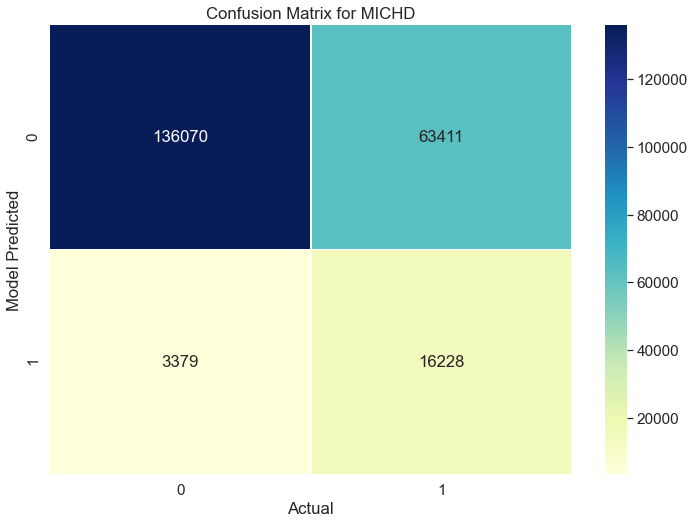

In [41]:
sns.set(font_scale=1.4)
sns.heatmap(cm0, annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
ax = plt.axes() 
ax.set(xlabel='Actual', ylabel='Model Predicted')
ax.set_title('Confusion Matrix for MICHD')
plt.show()

In [42]:
print(classification_report(y0_overall, y0_pred))
# Model Accuracy = 75%
# Model Recall = 77% for Class 0, 62% for class 1

              precision    recall  f1-score   support

           0       0.98      0.68      0.80    199481
           1       0.20      0.83      0.33     19607

    accuracy                           0.70    219088
   macro avg       0.59      0.75      0.56    219088
weighted avg       0.91      0.70      0.76    219088



# Fit for CHCCOPD2

In [ ]:
model1 = keras.Sequential([
    keras.layers.Dense(32, input_shape=(32,), activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu'), 
    keras.layers.Dense(1, activation='sigmoid')])


model1.compile(optimizer='adam', 
	          loss=keras.losses.BinaryCrossentropy(from_logits=True),
	          metrics=['Recall'])

In [ ]:
model1.fit(X1_os.values, y1_os.values, batch_size=16, epochs=10)

In [ ]:
print("EVALUATION")
model1.evaluate(X1_test.values, y1_test.values)

In [ ]:
y1_pred = model1.predict_classes(X1_test.values)
print("Prediction", y1_pred)

In [ ]:
unique_elements, counts_elements = np.unique(y1_pred, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

In [ ]:
cm1 = confusion_matrix(y1_test, y1_pred)
cm1

In [ ]:
sns.set(font_scale=1.4)
sns.heatmap(cm1, annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
ax = plt.axes()
ax.set(xlabel='Actual', ylabel='Model Predicted')
ax.set_title('Confusion Matrix for CHCCOPD2')
plt.show()

In [ ]:
print(classification_report(y1_test, y1_pred))
# Model Accuracy = 76%
# Model Recall = 76% for Class 0, 67% for class 1

# Fit for CHCKDNY2

In [ ]:
model2 = keras.Sequential([
    keras.layers.Dense(32, input_shape=(32,), activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu'), 
    keras.layers.Dense(1, activation='sigmoid')])

model2.compile(optimizer='adam', 
	          loss=keras.losses.BinaryCrossentropy(from_logits=True),
	          metrics=['Recall'])

In [ ]:
model2.fit(X2_os.values, y2_os.values, batch_size=16, epochs=10)

In [ ]:
print("EVALUATION")
model2.evaluate(X2_test.values, y2_test.values)

In [ ]:
y2_pred = model2.predict_classes(X2_test.values)
print("Prediction", y2_pred)
# np.array(X0_os.iloc[0])

In [ ]:
unique_elements, counts_elements = np.unique(y2_pred, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

In [ ]:
cm2 = confusion_matrix(y2_test, y2_pred)
cm2

In [ ]:
sns.set(font_scale=1.4)
sns.heatmap(cm2, annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
ax = plt.axes()
ax.set(xlabel='Actual', ylabel='Model Predicted')
ax.set_title('Confusion Matrix for CHCKDNY2')
plt.show()

In [ ]:
print(classification_report(y2_test, y2_pred))

# Model Accuracy = 77%
# Model Recall = 78% for Class 0, 53% for class 1

# Fit for CVDSTRK3

In [ ]:
model3 = keras.Sequential([
    keras.layers.Dense(32, input_shape=(32,), activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu'), 
    keras.layers.Dense(1, activation='sigmoid')])

#final layer = 2 because for each NN we are making, its for 1 disease thus its either Yes/No.

model3.compile(optimizer='adam', 
	          loss=keras.losses.BinaryCrossentropy(from_logits=True),
	          metrics=['Recall'])

In [ ]:
model3.fit(X3_os.values, y3_os.values, batch_size=16, epochs=10)

In [ ]:
print("EVALUATION")
model3.evaluate(X3_test.values, y3_test.values)

In [ ]:
y3_pred = model3.predict_classes(X3_test.values)
print("Prediction", y3_pred)
# np.array(X0_os.iloc[0])

In [ ]:
unique_elements, counts_elements = np.unique(y3_pred, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

In [ ]:
cm3 = confusion_matrix(y3_test, y3_pred)
cm3

In [ ]:
sns.set(font_scale=1.4)
sns.heatmap(cm3, annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
ax = plt.axes()
ax.set(xlabel='Actual', ylabel='Model Predicted')
ax.set_title('Confusion Matrix for CVDSTRK3')
plt.show()

In [ ]:
print(classification_report(y3_test, y3_pred))
# Model Accuracy = 79%
# Model Recall = 88% for Class 0, 16% for class 1

# Fit for DIABETE4

In [ ]:
#try do one hot encode
model4 = keras.Sequential([
    keras.layers.Dense(32, input_shape=(32,), activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu'), 
    keras.layers.Dense(1, activation='sigmoid')])


model4.compile(optimizer='adam', 
	          loss=keras.losses.BinaryCrossentropy(from_logits=True),
	          metrics=['Recall'])

In [ ]:
model4.summary()

In [ ]:
model4.fit(X4_os.values, y4_os.values, 
           batch_size=16, epochs=10)

In [ ]:
print("EVALUATION")
model4.evaluate(X4_test.values, y4_test.values)

In [ ]:
y4_pred = model4.predict_classes(X4_test.values)
print("Prediction", y4_pred)
# np.array(X0_os.iloc[0])

In [ ]:
unique_elements, counts_elements = np.unique(y4_pred, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

In [ ]:
cm4 = confusion_matrix(y4_test, y4_pred)
cm4

In [ ]:
sns.set(font_scale=1.4)
sns.heatmap(cm4, annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
ax = plt.axes()
ax.set(xlabel='Actual', ylabel='Model Predicted')
ax.set_title('Confusion Matrix for DIABETE4')
plt.show()

In [ ]:
print(classification_report(y4_test, y4_pred))
# Model Accuracy = 68%
# Model Recall = 66% for Class 0, 76% for class 1

# SHAP Section
## Objective to learn variable importance

In [ ]:
import shap

In [ ]:
shap.initjs()
explainer1 = shap.DeepExplainer(model0, X0_test[:500].values)
shap_values = explainer1.shap_values(X0_test.values)
ax = plt.axes() 
ax.set_title('Feature Importance for MICHD')
shap.summary_plot(shap_values, X0_test)
plt.show()

In [ ]:
shap.initjs()
explainer1 = shap.DeepExplainer(model1, X1_test[:500].values)
shap_values1 = explainer1.shap_values(X1_test.values)
ax = plt.axes() 
ax.set_title('Feature Importance for CHCCOPD2')
shap.summary_plot(shap_values1, X1_test)
plt.show()

In [ ]:
explainer2 = shap.DeepExplainer(model2, X2_test[:500].values)
shap_values2 = explainer1.shap_values(X2_test.values)# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
ax = plt.axes() 
ax.set_title('Feature Importance for CHCKDNY2')
shap.summary_plot(shap_values2, X2_test)
plt.show()

In [ ]:
explainer3 = shap.DeepExplainer(model3, X3_os[:100].values)
shap_values3 = explainer3.shap_values(X3_test.values)
ax = plt.axes() 
ax.set_title('Feature Importance for CVDSTRK3')
shap.summary_plot(shap_values3, X3_test)
plt.show()

In [ ]:
explainer4 = shap.DeepExplainer(model4, X4_os[:500].values)
shap_values4 = explainer4.shap_values(X4_test.values)
ax = plt.axes() 
ax.set_title('Feature Importance for DIABETE4')
shap.summary_plot(shap_values4, X4_test)
plt.show()

In [ ]:
shap.force_plot(explainer4.expected_value, shap_values4, X4_test)

In [ ]:
shap.plots.force(explainer4.expected_value[0], shap_values4[0], feature_names = x_col)